In [16]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [2]:
accidents = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
accidents.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


In [6]:
accidents['Accident_Severity'] = accidents['Accident_Severity'].fillna(accidents['Accident_Severity'].mode()[0])
accidents['Light_Conditions'] = accidents['Light_Conditions'].fillna(accidents['Light_Conditions'].mode()[0])
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna(accidents['Road_Surface_Conditions'].mode()[0])
accidents['Number_of_Casualties'] = accidents['Number_of_Casualties'].fillna(accidents['Number_of_Casualties'].median())
accidents['Number_of_Vehicles'] = accidents['Number_of_Vehicles'].fillna(accidents['Number_of_Vehicles'].median())
accidents['District Area'] = accidents['District Area'].fillna(accidents['District Area'].mode()[0])

In [7]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [11]:
accidents['Accident Date'] = accidents['Accident Date'].astype(str)
accidents['Accident Date'] = accidents['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
accidents['Accident Date'] = accidents['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst=True, errors='coerce')

accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mode()[0])
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mode()[0])
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna('unaccounted')
accidents['Road_Type'] = accidents['Road_Type'].fillna('unaccounted')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna('unaccounted')

accidents.dtypes
accidents.isnull().sum()

accidents['Year'] = accidents['Accident Date'].dt.year
accidents['Month'] =  accidents['Accident Date'].dt.month
accidents['Day'] =  accidents['Accident Date'].dt.day
accidents['DayOfWeek'] =  accidents['Accident Date'].dt.dayofweek
accidents.isnull().sum()

Index                       0
Accident_Severity           0
Accident Date               0
Latitude                    0
Light_Conditions            0
District Area               0
Longitude                   0
Number_of_Casualties        0
Number_of_Vehicles          0
Road_Surface_Conditions     0
Road_Type                   0
Urban_or_Rural_Area        15
Weather_Conditions          0
Vehicle_Type                0
Year                        0
Month                       0
Day                         0
DayOfWeek                   0
dtype: int64

<h1> Part 1: Using District Area to make a comparison to a general result </h1>
<h3>Richmond upon Thames Analysis</h3>
<img src = 'https://keyassets.timeincuk.net/inspirewp/live/wp-content/uploads/sites/8/2019/11/GettyImages-886370192_353881512_583992352-e1573040033502-1920x1358.jpg'\>

In [25]:
Richmond_upon_Thames_accidents = accidents[accidents['District Area'] == 'Richmond upon Thames']

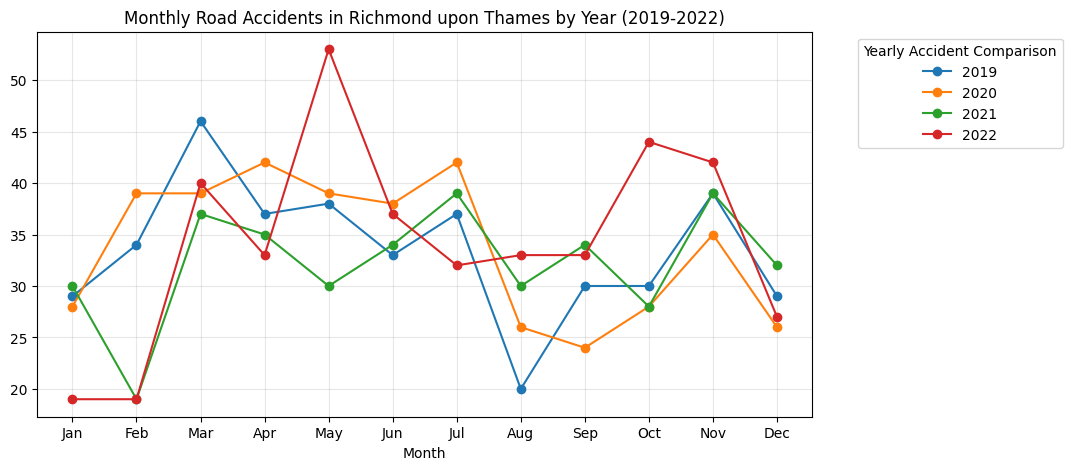

In [26]:
monthly_londondata = Richmond_upon_Thames_accidents.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Richmond upon Thames by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

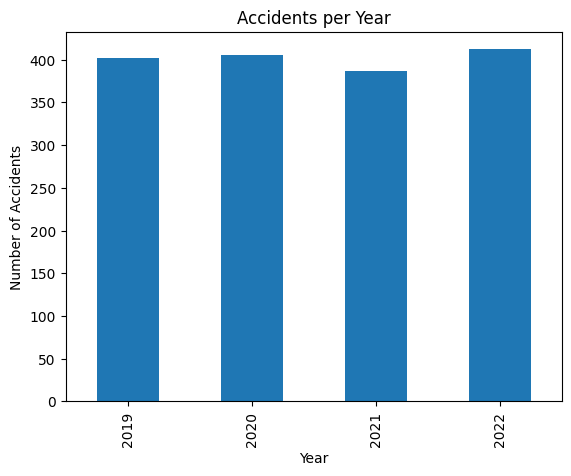

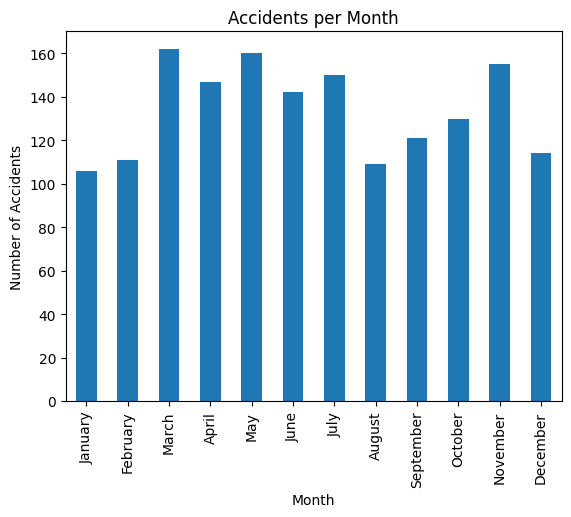

DayOfWeek
Monday       174
Tuesday      229
Wednesday    264
Thursday     226
Friday       249
Saturday     252
Sunday       213
Name: count, dtype: int64


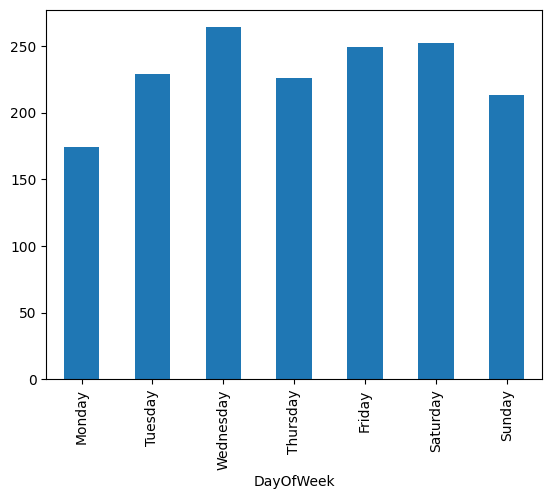

In [18]:
accidents_per_year = Richmond_upon_Thames_accidents['Year'].value_counts().sort_index()
accidents_per_month = Richmond_upon_Thames_accidents['Month'].value_counts().sort_index()
accidents_per_day = Richmond_upon_Thames_accidents['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [19]:
locations = list(zip(Richmond_upon_Thames_accidents['Latitude'], Richmond_upon_Thames_accidents['Longitude']))

m = folium.Map(location=[Richmond_upon_Thames_accidents['Latitude'].mean(), Richmond_upon_Thames_accidents['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>
<h1> Part 2: Using District Area to make a comparison to a general result </h1>
<h3>Vale Royal Analysis</h3>
<img src = 'https://d36i36zeavk0em.cloudfront.net/images/Outside-of-Warrington-Vale-Royal-College.jpeg?v=1716280945'\>

In [22]:
Vale_Royal_accidents = accidents[accidents['District Area'] == 'Vale Royal']

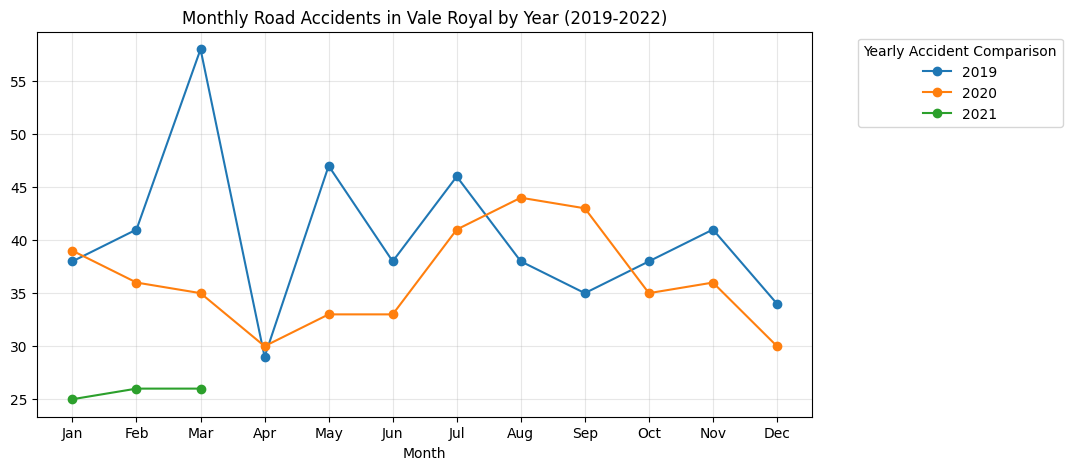

In [23]:
monthly_londondata = Vale_Royal_accidents.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Vale Royal by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

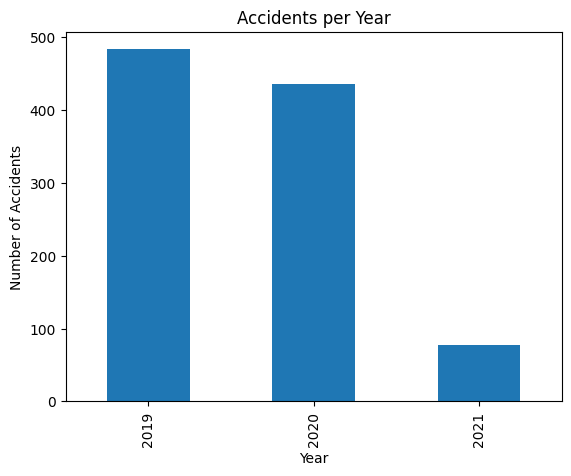

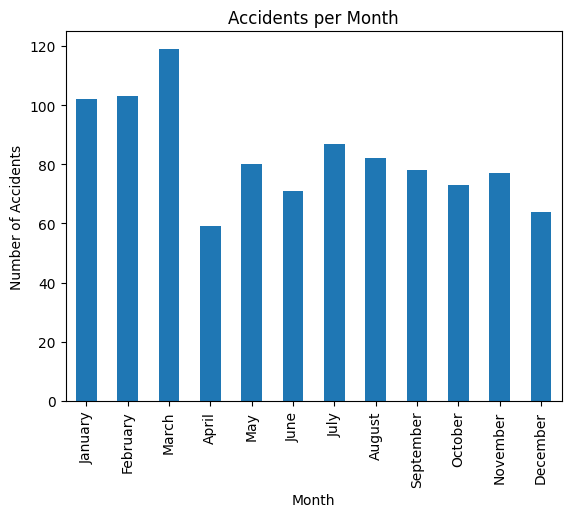

DayOfWeek
Monday        98
Tuesday      125
Wednesday    154
Thursday     141
Friday       172
Saturday     168
Sunday       137
Name: count, dtype: int64


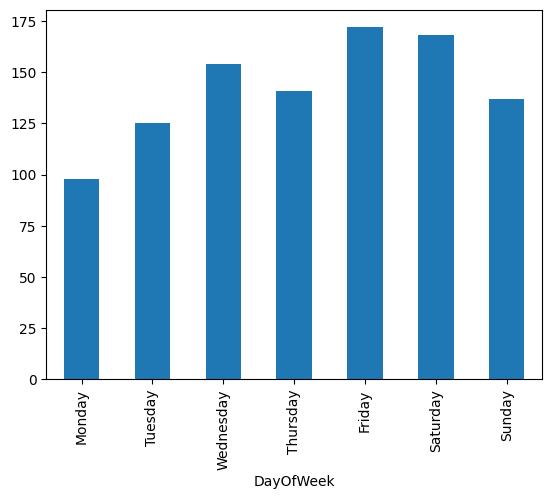

In [24]:
accidents_per_year = Vale_Royal_accidents['Year'].value_counts().sort_index()
accidents_per_month = Vale_Royal_accidents['Month'].value_counts().sort_index()
accidents_per_day = Vale_Royal_accidents['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [27]:
locations = list(zip(Vale_Royal_accidents['Latitude'], Vale_Royal_accidents['Longitude']))

m = folium.Map(location=[Vale_Royal_accidents['Latitude'].mean(), Vale_Royal_accidents['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>

<h1> Part 3: Using District Area to make a comparison to a general result </h1>
<h3>Tameside Analysis</h3>
<img src = 'https://www.constructionenquirer.com/wp-content/uploads/106035161_3034092546678076_1874287685539041778_n-1200x828.jpg'\>

In [28]:
Tameside_accidents = accidents[accidents['District Area'] == 'Tameside']

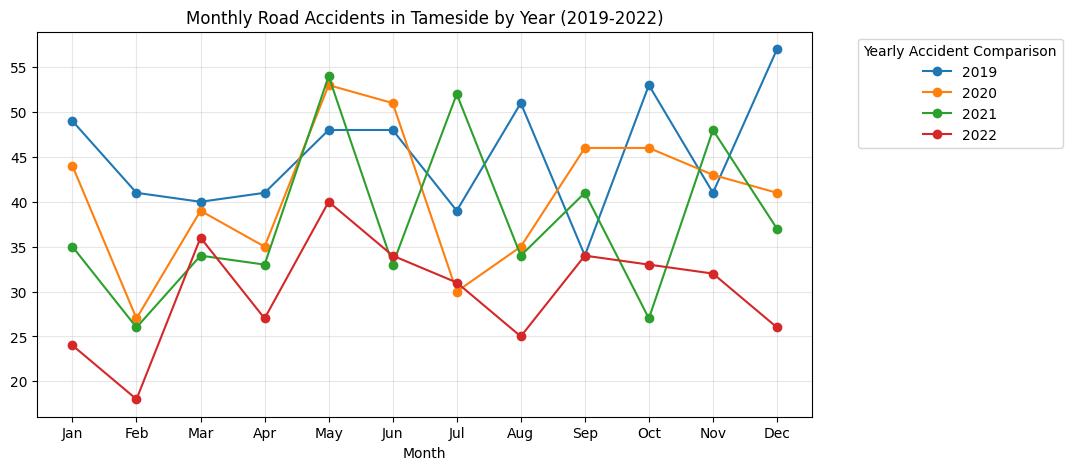

In [30]:
monthly_londondata = Tameside_accidents.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Tameside by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

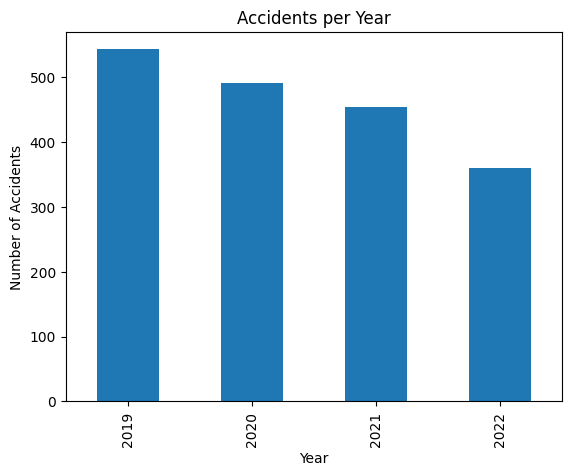

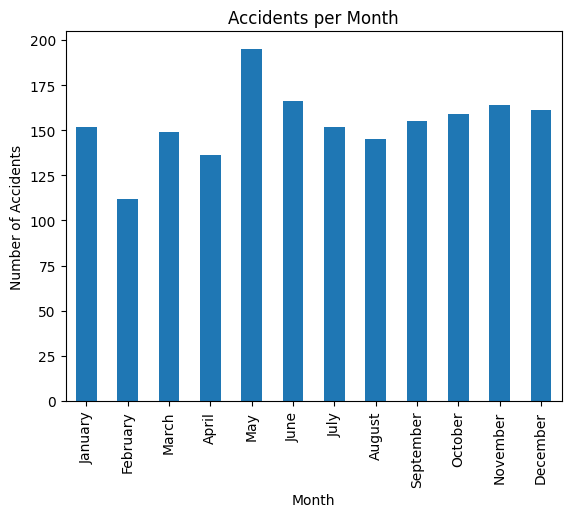

DayOfWeek
Monday       198
Tuesday      264
Wednesday    282
Thursday     274
Friday       274
Saturday     306
Sunday       248
Name: count, dtype: int64


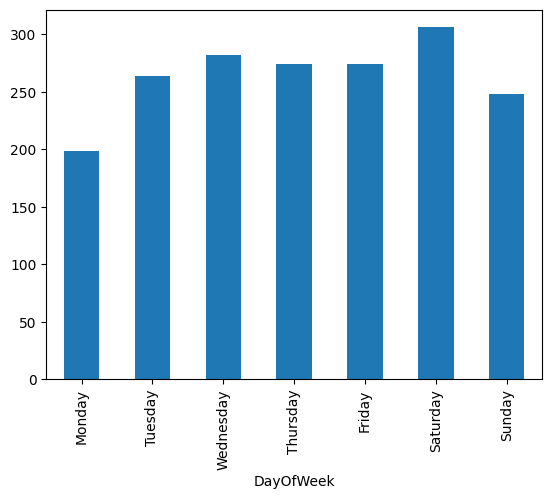

In [31]:
accidents_per_year = Tameside_accidents['Year'].value_counts().sort_index()
accidents_per_month = Tameside_accidents['Month'].value_counts().sort_index()
accidents_per_day = Tameside_accidents['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [32]:
locations = list(zip(Tameside_accidents['Latitude'], Tameside_accidents['Longitude']))

m = folium.Map(location=[Tameside_accidents['Latitude'].mean(), Tameside_accidents['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>

<h1> Part 4: Using District Area to make a comparison to a general result </h1>
<h3>Pendle Analysis</h3>
<img src = 'https://media.onthemarket.com/properties/16510610/1530773747/image-0-1024x1024.jpg'\>

In [34]:
Pendle_accidents = accidents[accidents['District Area'] == 'Pendle']

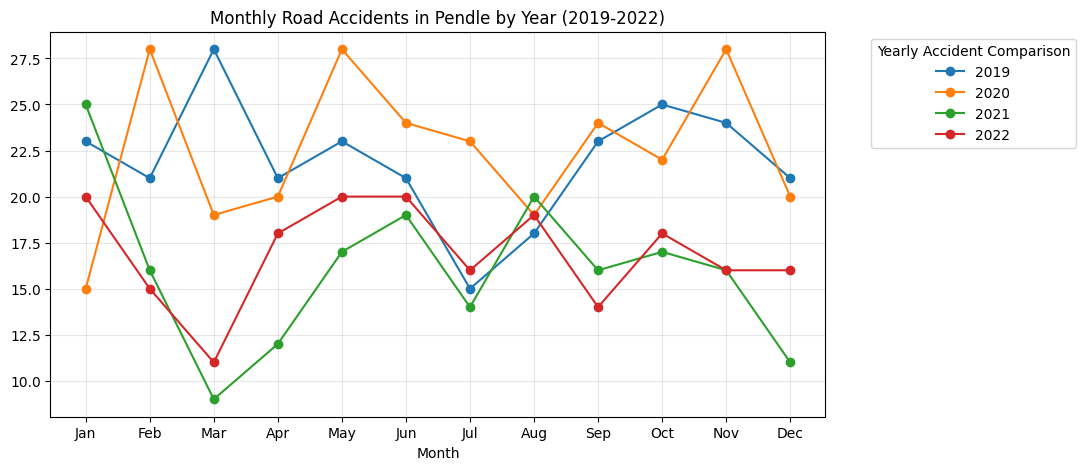

In [35]:
monthly_londondata = Pendle_accidents.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Pendle by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

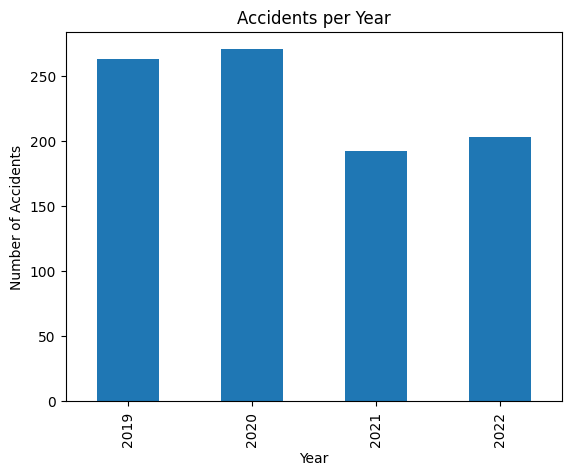

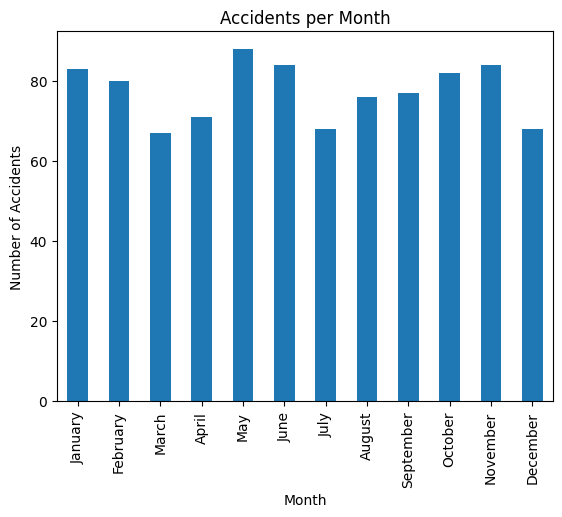

DayOfWeek
Monday        92
Tuesday      143
Wednesday    144
Thursday     131
Friday       137
Saturday     150
Sunday       131
Name: count, dtype: int64


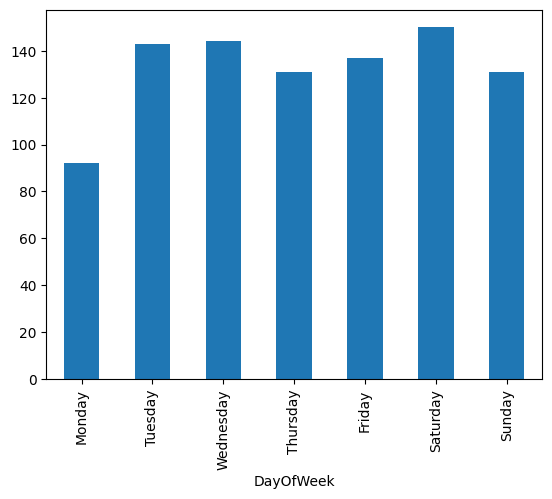

In [36]:
accidents_per_year = Pendle_accidents['Year'].value_counts().sort_index()
accidents_per_month = Pendle_accidents['Month'].value_counts().sort_index()
accidents_per_day = Pendle_accidents['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [37]:
locations = list(zip(Pendle_accidents['Latitude'], Pendle_accidents['Longitude']))

m = folium.Map(location=[Pendle_accidents['Latitude'].mean(), Pendle_accidents['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>

<h1> Part 5: Using District Area to make a comparison to a general result </h1>
<h3>High Peak Analysis</h3>
<img src = 'https://media.timeout.com/images/100682973/image.jpg'\>

In [38]:
High_Peak_accidents = accidents[accidents['District Area'] == 'High Peak']

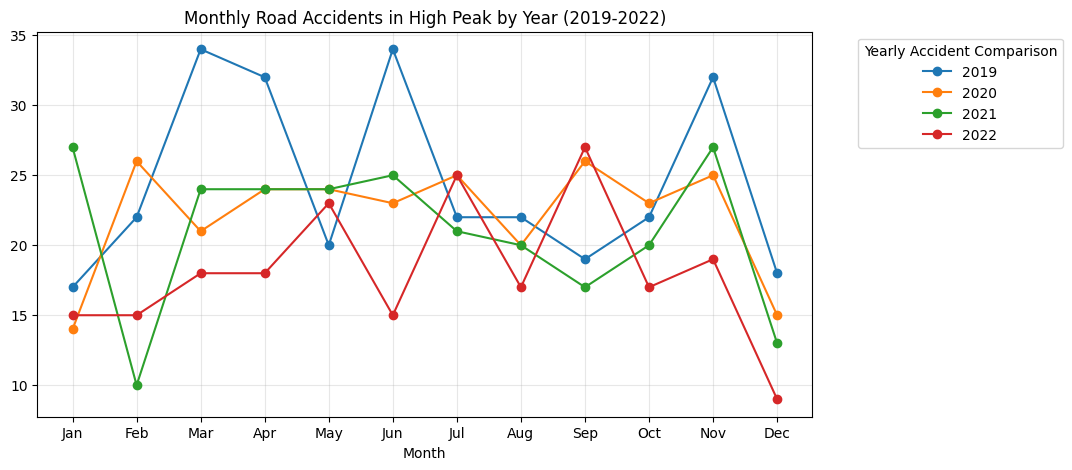

In [40]:
monthly_londondata = High_Peak_accidents.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in High Peak by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

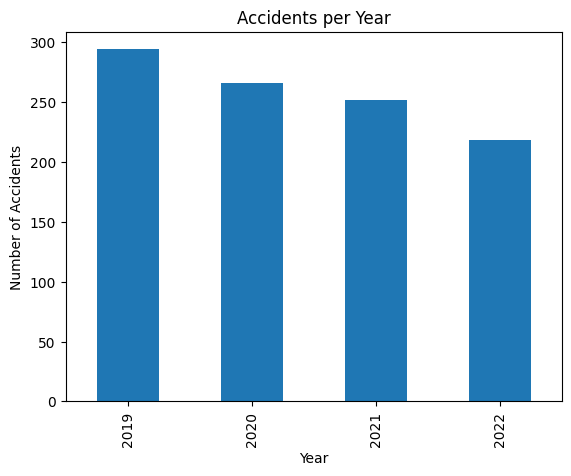

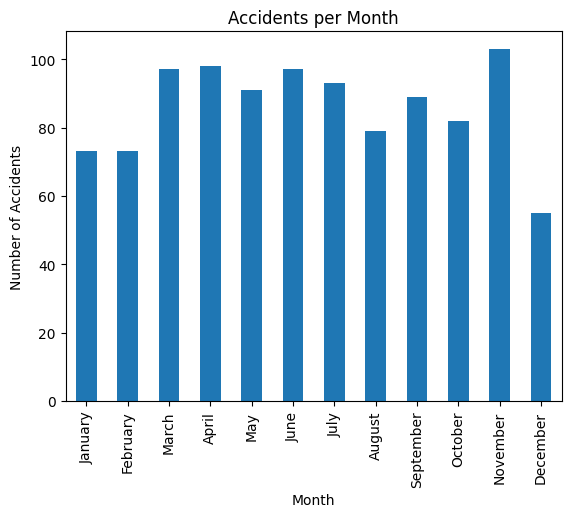

DayOfWeek
Monday       144
Tuesday      160
Wednesday    157
Thursday     124
Friday       136
Saturday     153
Sunday       156
Name: count, dtype: int64


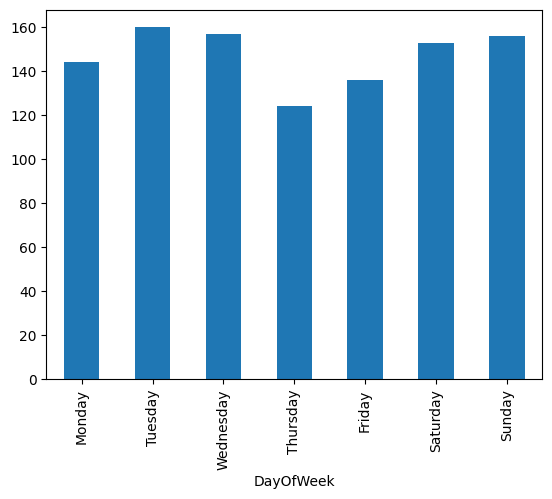

In [41]:
accidents_per_year = High_Peak_accidents['Year'].value_counts().sort_index()
accidents_per_month = High_Peak_accidents['Month'].value_counts().sort_index()
accidents_per_day = High_Peak_accidents['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [42]:
locations = list(zip(High_Peak_accidents['Latitude'], High_Peak_accidents['Longitude']))

m = folium.Map(location=[High_Peak_accidents['Latitude'].mean(), High_Peak_accidents['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>

<h1> Part 6: Using District Area to make a comparison to a general result </h1>
<h3> Ashford Analysis</h3>
<img src = 'https://www.bournesmoves.com/hs-fs/hubfs/blog-files/ashford.jpg?width=600&name=ashford.jpg'\>

In [43]:
Ashford_accidents = accidents[accidents['District Area'] == 'Ashford']

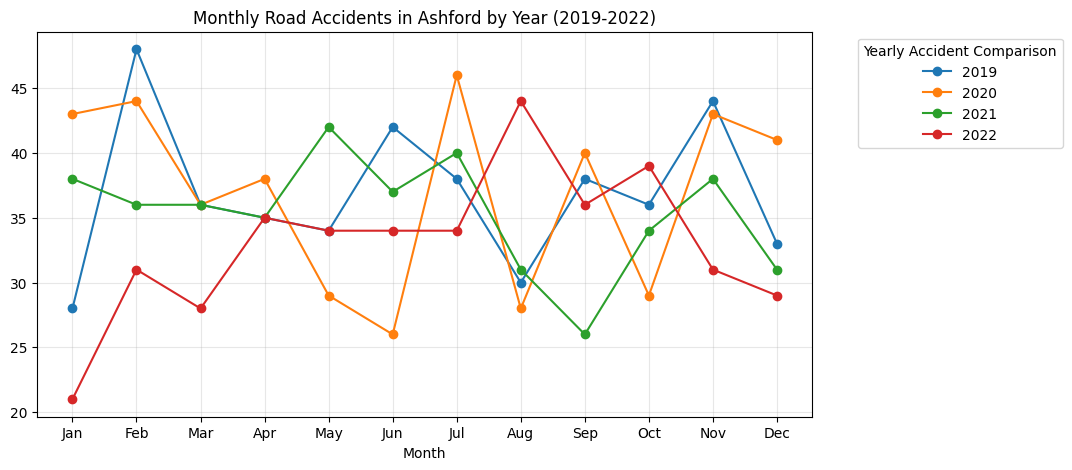

In [45]:
monthly_londondata = Ashford_accidents.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Ashford by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

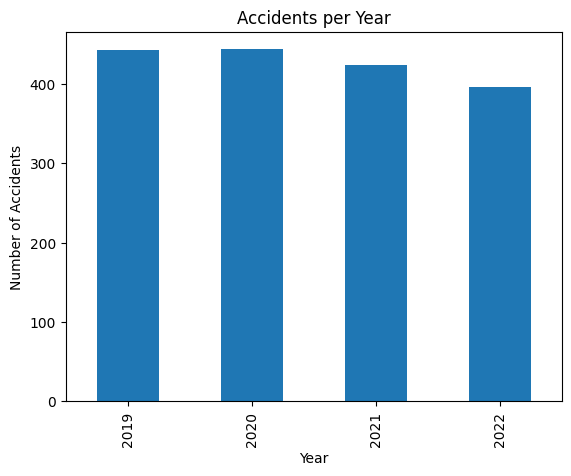

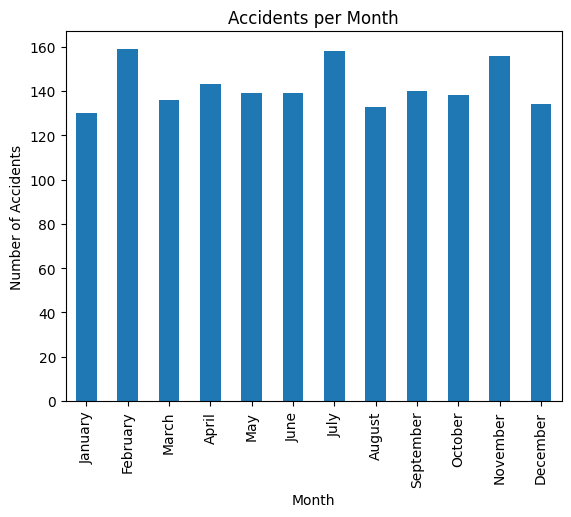

DayOfWeek
Monday       208
Tuesday      240
Wednesday    255
Thursday     258
Friday       250
Saturday     250
Sunday       244
Name: count, dtype: int64


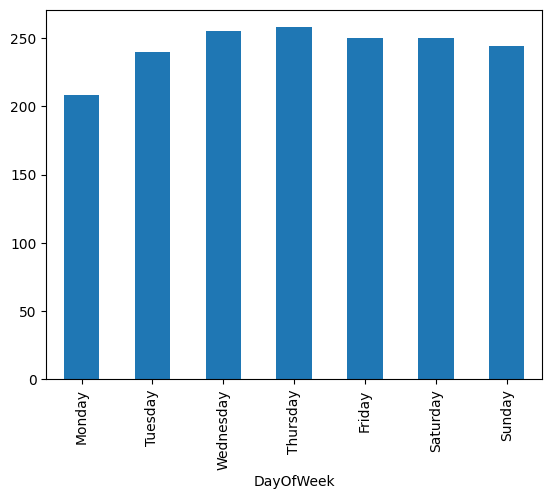

In [46]:
accidents_per_year = Ashford_accidents['Year'].value_counts().sort_index()
accidents_per_month = Ashford_accidents['Month'].value_counts().sort_index()
accidents_per_day = Ashford_accidents['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [47]:
locations = list(zip(Ashford_accidents['Latitude'], Ashford_accidents['Longitude']))

m = folium.Map(location=[Ashford_accidents['Latitude'].mean(), Ashford_accidents['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m